In [278]:
import numpy as np
import matplotlib.pyplot as plt

In [525]:
class Perceptron(object):
    
    def __init__(self, inp_size, x_train, y_train, thres, epochs, lr):
        self.w = np.random.randint(-5,5, (inp_size)).astype('float')
        self.x_train = x_train
        self.y_train = y_train
        self.pred = np.array([])
        self.epochs = epochs
        self.lr = lr
        self.thres = thres
        self.costs = np.array([])
    
    def get_cost(self):
        pred = (self.w @ self.x_train.T > self.thres).astype('int')
        c = np.sum(((self.y_train - pred)**2))/2
        
        return c, pred
    
    def get_derivative(self, pred):
        return np.sum( ( (pred - y_train) * x_train.T).T, 0 )

    def check_early_stopping(self):
        
        if len(self.costs) < 100:
            return 0
        vals = set()
        for j in self.costs[::-1][:100]:
            vals.add(j)
        return len(vals) == 1
            
    def fit(self):
        
        print("Initial Weights: ", self.w)
        for i in range(self.epochs):
            
            c, pred = self.get_cost()
            self.w = self.w - self.lr*self.get_derivative(pred)
    
            self.costs = np.append(self.costs, c)
        
            if self.check_early_stopping():
                break
        
        print("Final Weights: ", self.w)
        print("Final Cost: ", c)
            
    def plot_cost(self):
        
        plt.plot(range(len(self.costs)), self.costs)
            
            

        
        
        

## AND Gate

Initial Weights:  [-3. -3.]
Final Weights:  [1.55 1.55]
Final Cost:  0.0


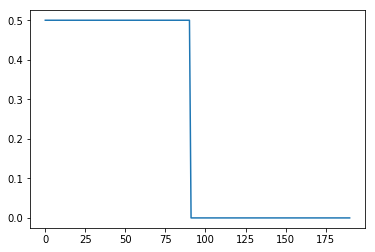

In [528]:
x_train = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
y_train = np.array([0,0,0,1])

a = Perceptron(2, x_train, y_train, 3.0, 1000, 0.05)
a.fit()

a.plot_cost()

## OR Gate

Initial Weights:  [-3. -5.]
Final Weights:  [3.   3.05]
Final Cost:  0.0


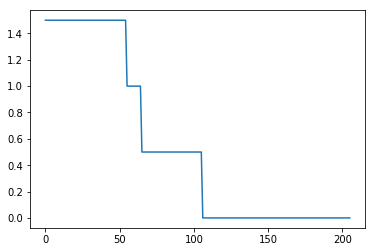

In [529]:
x_train = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
y_train = np.array([0,1,1,1])

a = Perceptron(2, x_train, y_train, 3, 1000, 0.05)
a.fit()

a.plot_cost()

## XOR Gate

Initial Weights:  [-1.  2.]
Final Weights:  [-3.   -0.05]
Final Cost:  0.5


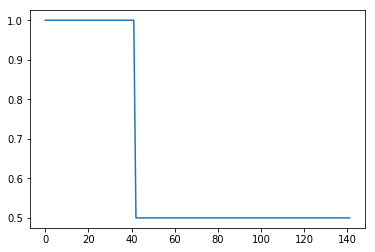

In [518]:
x_train = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
y_train = np.array([0,1,1,0])

a = Perceptron(2, x_train, y_train, -3, 1000, 0.05)
a.fit()

a.plot_cost()